# Project: TMDb Movie Data Analysis

### Introduction

##### In this project, i used ( TMDb Movie Data ) and analyze it for 15 years ago by answering a number of questions:

### Question 1 : What kind of movie was the most popular in the last 15 years?
### Question 2 : What is the budget each genre in 15 years ago?
### Question 3 : Which genre has the large number of movies in 15 years ago?
### Question 4 : What kind the relationship between popularity and genres?

## import the libraries i used

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data wrangling 
##### process of gathering , selecting, and transforming data . We do that to answer an analytical question 

In [3]:
#upload the data and display 10 lines
df=pd.read_csv('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#check for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#check for duplicate data
df.duplicated().sum()

1

### Cleaning Data¶
#### remove columns i do not used or not useful , missing data, and duplicate data ( redundancy )


In [ ]:
# remove columns that not useful 
d_list=['imdb_id','homepage','cast','keywords','tagline','production_companies'
        ,'overview','release_date','budget_adj','revenue_adj']
df.drop(d_list,axis=1,inplace=True)

In [9]:
#replace 0 by null
df['revenue']=df['revenue'].replace(0,np.nan)
df['budget']=df['budget'].replace(0,np.nan)

In [10]:
#split genre string to the primary genre
df["genres"]= df["genres"].str.split("|",expand=True) 

In [11]:
#remove missing data and sure if removed 
df.dropna(inplace=True)
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [15]:
#remove duplicated data sure if removed 
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

#### I get the data for 15 year and stored in "last_15_data" ¶

In [18]:
 last_15_data=df.query('release_year>=2000')

## Exploratory Data Analysis

### Question 1 : What kind of movie was the most popular in the last 15 years?

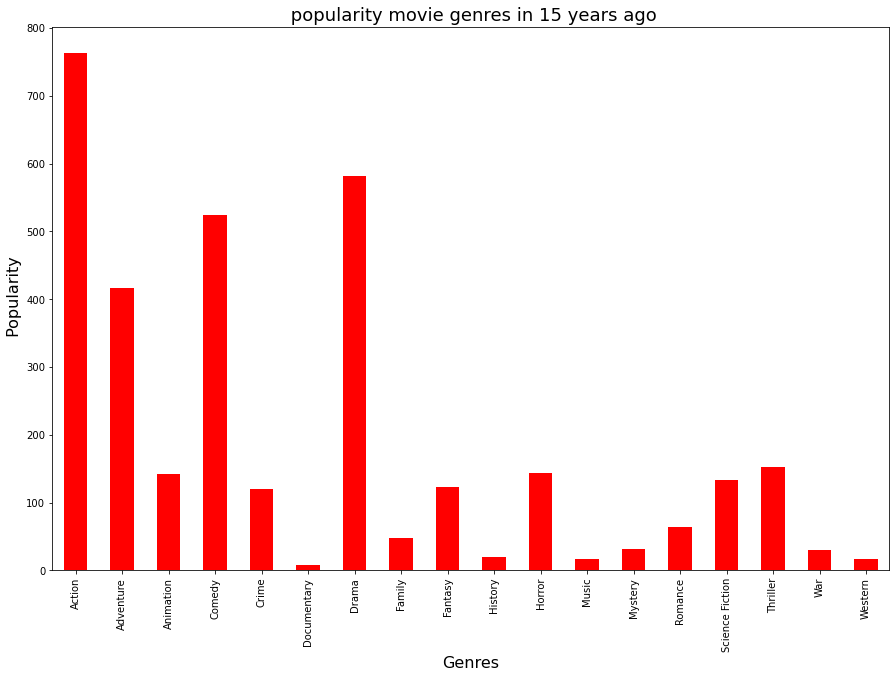

In [28]:
popularity_Barchart=last_15_data.groupby('genres').popularity.sum()
popularity_Barchart.plot(kind='bar',color='red',figsize=(15,10))
plt.title(' popularity movie genres in 15 years ago',fontsize=18)
plt.xlabel("Genres",fontsize=16)
plt.ylabel(" Popularity",fontsize=16);

### according to bar chart, we can see the action movies have the most popularity almost 770 in 15 years ago, after that in second is drama movies almost 590 .while the documentary movies have the least popularity almost 10.

### Question 2 : What is the budget each genre in 15 years ago?

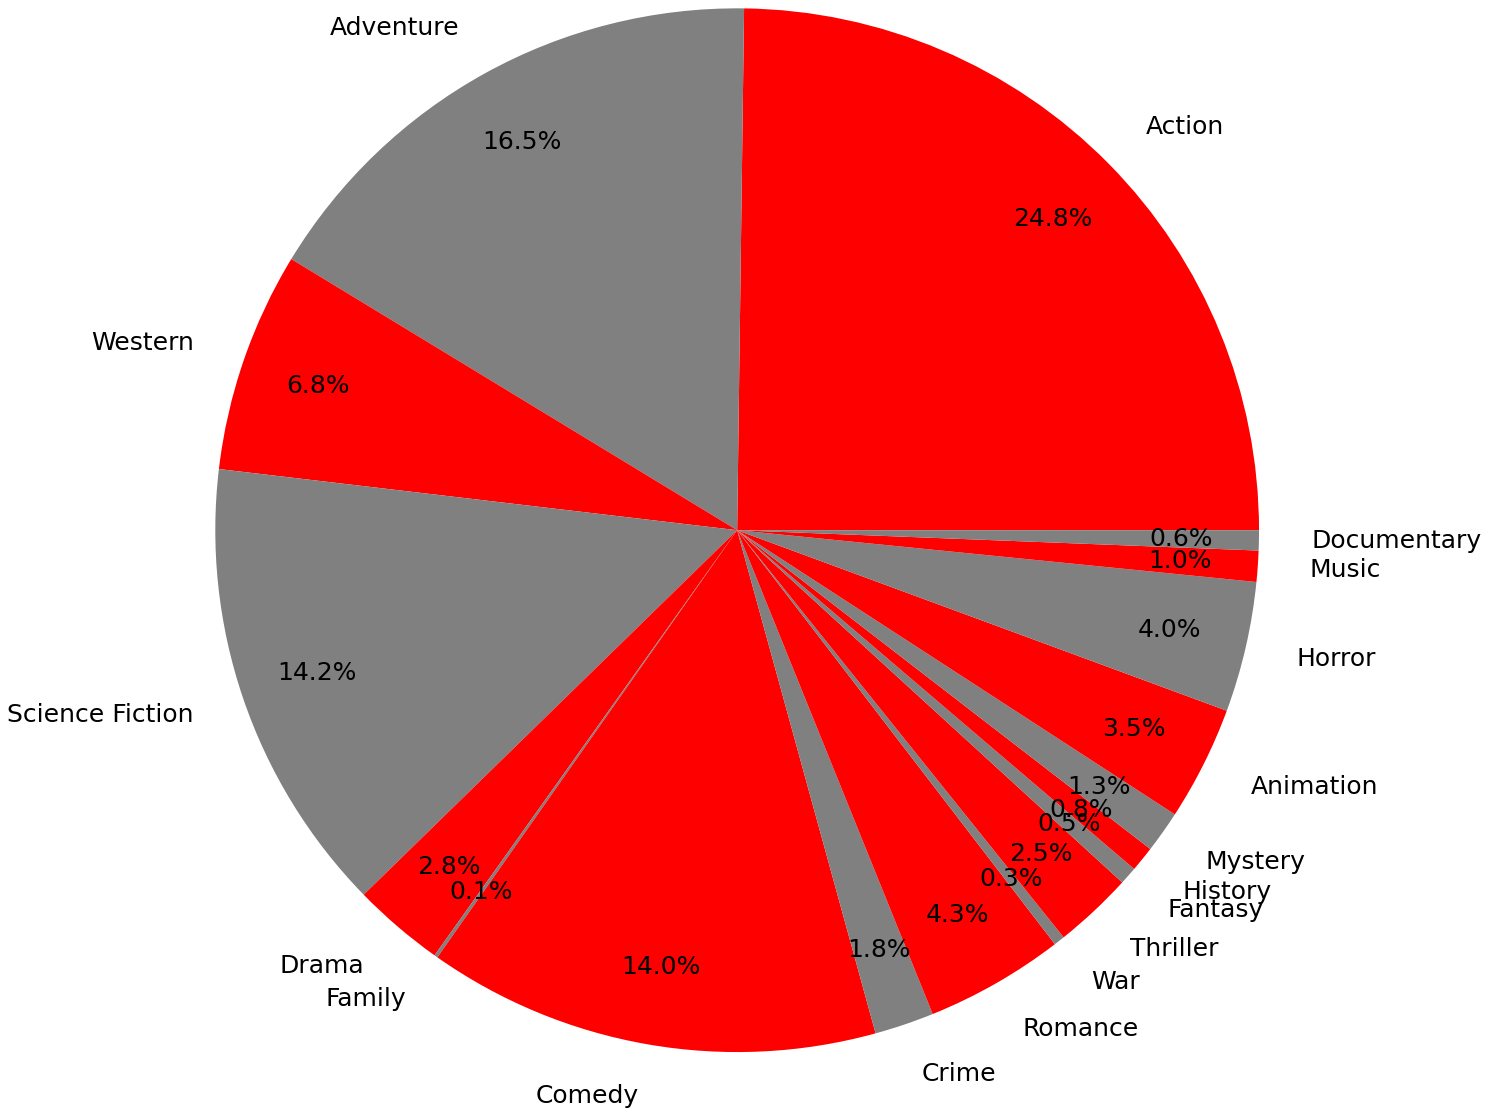

In [32]:
Graph=last_15_data.groupby('genres').budget.sum()
labels_l=last_15_data.genres.unique()
color=['red','gray']
plt.pie(Graph,radius=6,labels=labels_l,colors=color,autopct='%1.1f%%',
        pctdistance=0.85,textprops={'fontsize': 25});

### according to pie chart, we can see tha Action movies have the highest budget is 24.8%  and the Adventure movies are in the second highest budget is 16.5% in the 15 years ago and in tha last family movies is 0.1%  .

### Question 3 : Which genre has the large number of movies in 15 years ago?

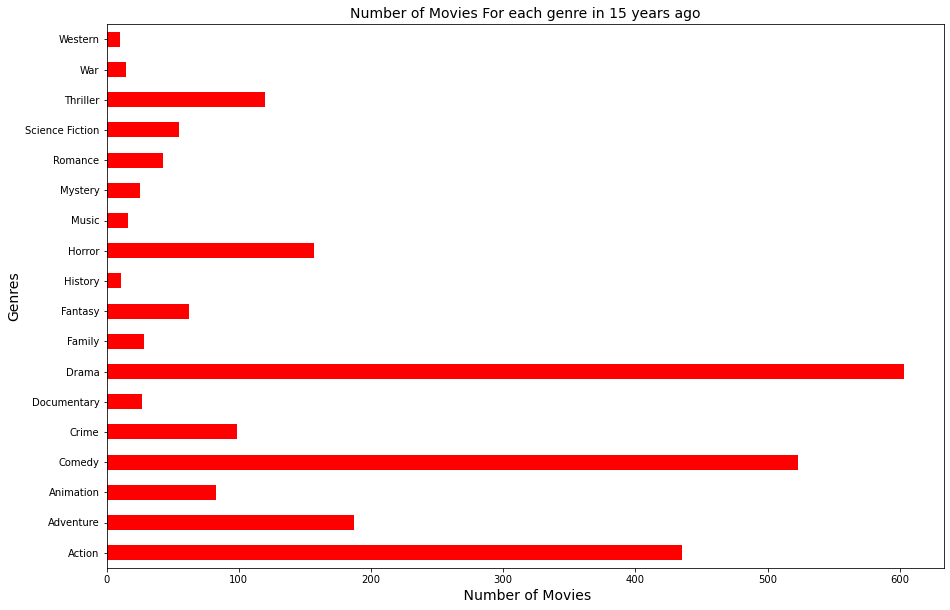

In [34]:
MovNum=last_15_data.groupby("genres").id.count()
MovNum.plot(kind="barh",color='red',figsize=(15,10));
plt.title("Number of Movies For each genre in 15 years ago",fontsize=14)
plt.xlabel(" Number of Movies",fontsize=14)
plt.ylabel("Genres",fontsize=14);

### according to bar chart, we can see the drama movies has the largest num of movies is almost 602 , after that in second the comedy movies almost 520 , in tha lastes the history almost 20 ,  history and western They have the close number of movies

### Question 4: What kind the relationship between popularity and genres?

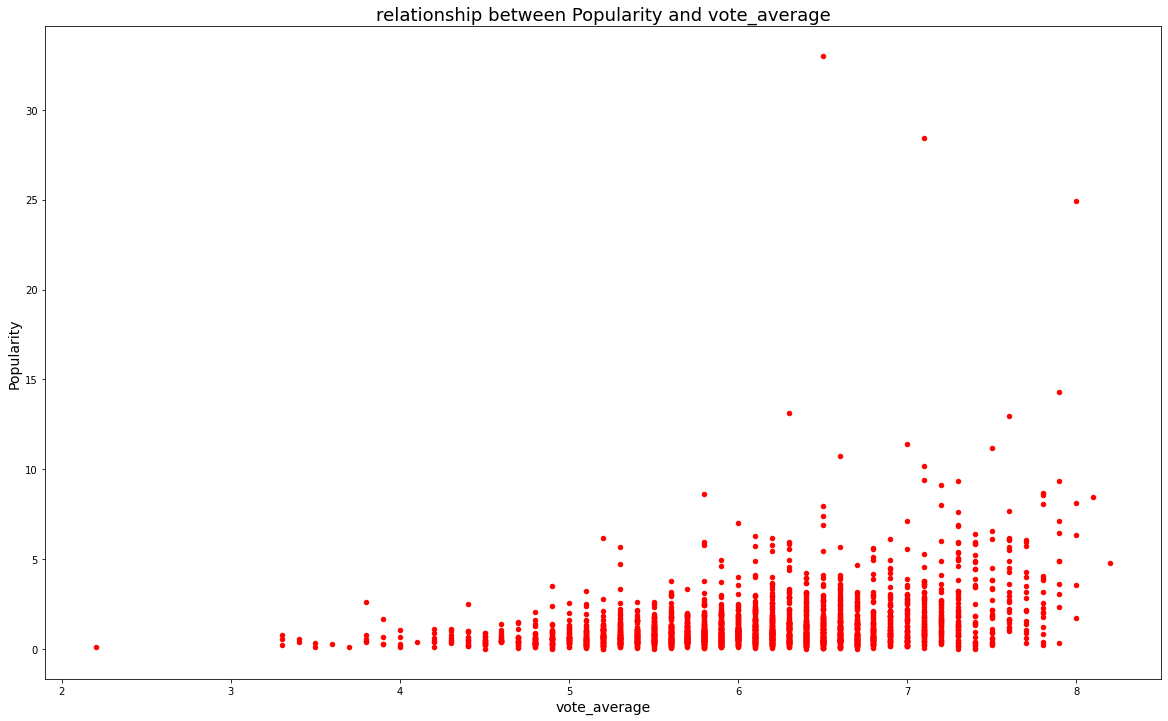

In [44]:
last_15_data.plot(kind='scatter',x='vote_average',y="popularity",color='red',figsize=(20,12));
plt.title("relationship between Popularity and vote_average",fontsize=18)
plt.xlabel("vote_average",fontsize=14)
plt.ylabel("Popularity",fontsize=14);

### according to scatter plot, we can see the Highly popular movies have more vote_average ( we can see Roughly represents a positive relationship ) 
### But it is not necessary to get the most votes means to get the highest popularity!! 
### We note at the number 6.5 in the vote_average did not get the highest vote but got the highest popularity 

# Limitations

### I had difficulty in dealing with my data because it was not ready. I had to clean it and remove all the unwanted data that is not useful to me in the analysis process, and I also removed the redundant data so that I would not have an excessive filler and removed the missing data

# Conclusions


### the action movies have the most popularity almost 770 in 15 years ago, after that in second is drama movies almost 590 .while the documentary movies have the least popularity almost 10.

### tha Action movies have the highest budget is 24.8% and the Adventure movies are in the second highest budget is 16.5% in the 15 years ago and in tha last family movies is 0.1%.

### the drama movies has the largest num of movies is almost 602 , after that in second the comedy movies almost 520 , in tha lastes the history almost 20 ,  history and western They have the close number of movies.

### the Highly popular movies have more vote_average ( we can see Roughly represents a positive relationship ) But it is not necessary to get the most votes means to get the highest popularity!! 


In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295